In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/szymo/Desktop/Nauka/Licencjat/Dane/licencjat dane/daily_avg_wyk/global-daily_avg.csv')
df

,data,srednia,zmiana
0,2017-01-01,743065.835,NaN
1,2017-01-02,774054.180,NaN
2,2017-01-03,831199.650,NaN
3,2017-01-04,846262.535,NaN
4,2017-01-05,849595.470,NaN
...,...,...,...
1526,2021-03-11,1227037.670,-11.0
1527,2021-03-12,1351404.315,-2.0
1528,2021-03-13,1335835.440,-3.0
1529,2021-03-14,1168262.035,-15.0


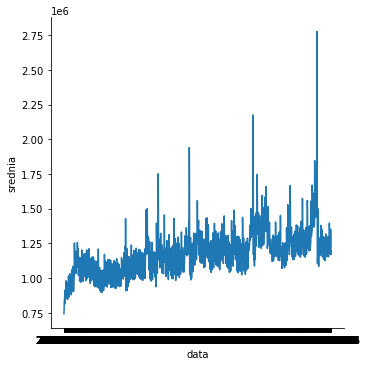

In [3]:
sns.relplot(
    data=df,  kind="line",
     x= "data", y="srednia"
)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [16]:
x = df['data'].tolist()
y = df['srednia'].tolist()

In [18]:
x = np.array(x)
y = np.array(y)

In [20]:
xnew = np.linspace(x.min(), x.max())
  
gfg = make_interp_spline(x, y, k=3)
  
y_new = gfg(xnew)
  
plt.plot(xnew, y_new)
  
plt.show()

TypeError: cannot perform reduce with flexible type

In [ ]:
x = 0
wszy = pd.DataFrame()
for kraj in kraje_wyk: 
    df = pd.DataFrame()
    try:
        avg = pd.read_csv('C:/Users/szymo/Desktop/Nauka/Licencjat/Dane/licencjat dane/daily_avg/'+kraj+'-daily_avg.csv')
        ctry = kody[kody["kraje"] == kraj]["kraje_rozw"].values[0]
        mob_kraj = mob.loc[mob['country_region'] == ctry]
        df = avg.merge(mob_kraj, how='right')
        df = df.drop(columns=['Unnamed: 0'], axis=1)
        df = df.dropna()
        if ctry in high_income:
            df['income'] = 'high'
        elif ctry in upper_middle:
            df['income'] = 'upper_middle'
        elif ctry in lower_middle:
            df['income'] = 'lower_middle'
        elif ctry in low_income:
            df['income'] = 'low'
        else:
            print("BRAK KLASYFIKACJI KRAJU: ", ctry)
        
        # Dodanie zmiennych
        wknd = []
        day = []
        month = []
        for da in df['data']:
            da = datetime.fromisoformat(da)
            mo = da.month
            weekday = da.weekday()
            
            # Miesiace
            if mo == 1:
                month.append('January')
            if mo == 2:
                month.append('February')
            if mo == 3:
                month.append('March')
            if mo == 4:
                month.append('April')
            if mo == 5:
                month.append('May')
            if mo == 6:
                month.append('June')
            if mo == 7:
                month.append('July')
            if mo == 8:
                month.append('August')
            if mo == 9:
                month.append('September')
            if mo == 10:
                month.append('October')
            if mo == 11:
                month.append('November')
            if mo == 12:
                month.append('December')
            
            # Dni
            if weekday == 0:
                wknd.append(0)
                day.append('monday')
            if weekday == 1:
                wknd.append(0)
                day.append('tuesday')
            if weekday == 2:
                wknd.append(0)
                day.append('wednesday')
            if weekday == 3:
                wknd.append(0)
                day.append('thursday')
            if weekday == 4:
                wknd.append(0)
                day.append('friday')
            if weekday == 5:
                wknd.append(1)
                day.append('saturday')
            if weekday == 6:
                wknd.append(1)
                day.append('sunday')
        df['month'] = month
        df['weekday'] = day
        df['is_weekend'] = wknd
        print(kraj, " - SUKCES")
    except:
        x = x+1
        print(kraj, " - ERROR")
    try:
        df = df[['data',
             'weekday',
             'srednia',
             'zmiana',
             'country_region',
             'retail_and_recreation_percent_change_from_baseline',
             'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             'residential_percent_change_from_baseline',
             'is_weekend',
             'month',
             'income']]
    except:
        try:
            df = df[['data',
                 'weekday',
                 'srednia',
                 'zmiana',
                 'country_region',
                 'retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline',
                 'parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline',
                 'workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline',
                 'is_weekend',
                 'month']]
        except:
            print(kraj, da, " - ERROR")
    #df.to_csv('C:/Users/szymo/Desktop/Nauka/Licencjat/Dane/licencjat dane/poszczegolne/'+ctry+'-data.csv', index=False)
    wszy = wszy.append(df, ignore_index=True)
print('Liczba bledow:', x)
wszy = wszy[['data',
         'weekday',
         'srednia',
         'zmiana',
         'country_region',
         'retail_and_recreation_percent_change_from_baseline',
         'grocery_and_pharmacy_percent_change_from_baseline',
         'parks_percent_change_from_baseline',
         'transit_stations_percent_change_from_baseline',
         'workplaces_percent_change_from_baseline',
         'residential_percent_change_from_baseline',
         'is_weekend',
         'month',
         'income']]
#wszy.to_csv('C:/Users/szymo/Desktop/Nauka/Licencjat/Dane/licencjat dane/merged.csv', index=False)